In [650]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [651]:
#read dataset 
df = pd.read_csv('loan.csv')
df.head()

/var/folders/vl/ds4939js6cn74f1bkm98d0fm0000gn/T/ipykernel_6022/1343964362.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [652]:
# Print the info and shape of the data
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


(39717, 111)

Dataset is having 39717 rows and 111 columns. We will try to see the meaningful columns.

In [657]:
# all the columns of data set
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [654]:
# null count for each columns
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

There are so many columns with null values, which will not help in analysis.

## Data Cleansing 
DataType changes and column values fixing



In [553]:
# Convert string object to date object for below columns
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

In [554]:
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

In [555]:
# Remove % and change the datatype to float
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

In [556]:
# It shows there is extra space in column value
print (list(df['term'])[0:5])

[' 36 months', ' 60 months', ' 36 months', ' 36 months', ' 60 months']


In [557]:
# Remove the space
df['term'] = df['term'].str.strip()

In [558]:
# Remove the months word from column value and change the datatype
df['term'] = df['term'].str.split().str[0].astype(int)

In [559]:
# Rename the column name
df.rename(columns={'term': 'term_period'}, inplace=True)

In [560]:
print (list(df['term_period'])[0:5])

[36, 60, 36, 36, 60]


In [561]:
#  delete columns with all the null values
df = df.dropna(axis=1, how="all")

In [562]:
#Out of 111 only 57 column remains
df.shape

(39717, 57)

In [563]:
#  delete columns with null  values more then 80%
df.dropna(thresh = len(df)* .75 ,axis=1, inplace=True)

In [564]:
#Out of 57, 5 more column dropped 
df.shape

(39717, 53)

In [565]:
# column with null or empty values
100 * df.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term_period                   0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

The code below will print the column with a number of null values. Those that do not have null values won’t be printed. This will also provide the percentage of null values of the respective columns.

In [566]:
null_cols = df.columns[df.isnull().any()]
null_df = df[null_cols].isnull().sum().to_frame(name='Null Count')\
          .merge(df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_df_sorted)

                            Null Count  Null Percent
emp_title                         2459      6.191303
emp_length                        1075      2.706650
pub_rec_bankruptcies               697      1.754916
last_pymnt_d                        71      0.178765
collections_12_mths_ex_med          56      0.140998
chargeoff_within_12_mths            56      0.140998
revol_util                          50      0.125891
tax_liens                           39      0.098195
title                               11      0.027696
last_credit_pull_d                   2      0.005036


In [567]:
# strip all columns with extra space
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [568]:
print(df['int_rate'].head())

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64


In [569]:
#convert date format 

df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

print(df['issue_d'].head())

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]


In [570]:
# clean revol_util column
df['revol_util'] = df['revol_util'].str.strip("%").astype('float')

In [571]:
df['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [572]:
df['revol_util'] = (df['revol_util'].fillna(df['revol_util'].mean()))

In [573]:
#check for null values in revol_util column
df['revol_util'].isnull().sum()

0

In [574]:
# fill pub_rec_bankruptcies na values with most common occurance values
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode().iloc[0]).astype('category')

/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: pub_rec_bankruptcies, Length: 39717, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

In [575]:
df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [576]:
df['pub_rec_bankruptcies'].isnull().sum()

697

In [577]:
# Impute the pub_rec_bankruptcies column with mode value
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies']==0)
df['pub_rec_bankruptcies'].value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [578]:
df['pub_rec_bankruptcies'].isnull().sum()

0

In [579]:
# It shows that the missing values occurres only for 'Charged Off' loan types
print (df[df['last_pymnt_d'].isnull()]['loan_status'].unique())

# Number of missing values
print (df.last_pymnt_d.isnull().sum())

['Charged Off']
71


In [580]:
#loan.loan_status.unique()
df[df['last_pymnt_d'].isnull() == True]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_period,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
26,1069800,1304679,15000,15000,8725.0,36,14.27,514.64,C,C2,...,0.0,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2724,1032519,1262161,8000,8000,3975.0,36,14.65,275.96,C,C3,...,0.0,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3613,1016039,1243723,6400,6400,6400.0,60,18.25,163.39,D,D5,...,0.0,2012-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3985,1009833,1236591,18000,18000,18000.0,60,19.03,467.23,E,E2,...,0.0,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4206,1006579,1232989,1800,1800,1800.0,36,8.90,57.16,A,A5,...,0.0,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36185,419505,492244,20000,20000,13975.0,36,11.89,663.28,B,B4,...,0.0,2009-12-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
36206,417817,487349,7800,7800,7725.0,36,10.95,255.17,B,B1,...,0.0,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
36209,418546,488538,2000,2000,2000.0,36,16.00,70.32,E,E2,...,0.0,2009-12-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
36937,392751,429885,25000,25000,11625.0,36,13.79,851.89,C,C5,...,0.0,2009-06-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [581]:
# Create new derived metric to store the number of months the borrower has paid
df['num_of_mnts_paid'] = round(df['total_pymnt']/df['installment'])
# Convert the datatype
df['num_of_mnts_paid'] = df['num_of_mnts_paid'].astype(int)
# Display subset data
df.loc[df['last_pymnt_d'].isnull(), ['funded_amnt','int_rate','installment','issue_d','last_pymnt_d','total_pymnt','num_of_mnts_paid']].head()


,funded_amnt,int_rate,installment,issue_d,last_pymnt_d,total_pymnt,num_of_mnts_paid
26,15000,14.27,514.64,2011-12-01,NaT,0.00,0
2724,8000,14.65,275.96,2011-11-01,NaT,0.00,0
3613,6400,18.25,163.39,2011-11-01,NaT,366.75,2
3985,18000,19.03,467.23,2011-11-01,NaT,0.00,0
4206,1800,8.90,57.16,2011-11-01,NaT,1800.00,31


In [582]:
# Create a column to store the last payment date which is created based on 'issue_d','num_of_mnts_paid columns
# Add +1 to date_of_mnts_paid as monthly installment will start from issue_d+1
df['date_of_mnts_paid'] = df.loc[df['num_of_mnts_paid']!=0, ['issue_d','num_of_mnts_paid']].apply(lambda x: x['issue_d'] + pd.DateOffset(months = x['num_of_mnts_paid']+1), axis=1)
df['date_of_mnts_paid']

0       2015-01-01
1       2013-06-01
2       2015-01-01
3       2015-01-01
4       2016-05-01
           ...    
39712   2010-08-01
39713   2010-08-01
39714   2010-06-01
39715   2010-05-01
39716   2010-07-01
Name: date_of_mnts_paid, Length: 39717, dtype: datetime64[ns]

In [583]:
#checking for null values
null_cols = df.columns[df.isnull().any()]
null_df = df[null_cols].isnull().sum().to_frame(name='Null Count')\
          .merge(df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_df_sorted)

                            Null Count  Null Percent
emp_title                         2459      6.191303
emp_length                        1075      2.706650
last_pymnt_d                        71      0.178765
collections_12_mths_ex_med          56      0.140998
chargeoff_within_12_mths            56      0.140998
tax_liens                           39      0.098195
date_of_mnts_paid                   17      0.042803
title                               11      0.027696
last_credit_pull_d                   2      0.005036


In [584]:
# Drop the observations of missing values of last_pymnt_d
df = df[pd.notnull(df['last_pymnt_d'])]

In [585]:
#checking for null values
null_cols = df.columns[df.isnull().any()]
null_df = df[null_cols].isnull().sum().to_frame(name='Null Count')\
          .merge(df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_df_sorted)

                            Null Count  Null Percent
emp_title                         2452      6.184735
emp_length                        1070      2.698885
collections_12_mths_ex_med          56      0.141250
chargeoff_within_12_mths            56      0.141250
tax_liens                           39      0.098371
title                               11      0.027746
last_credit_pull_d                   2      0.005045
date_of_mnts_paid                    1      0.002522


In [586]:
# Print the unique values of emp_length
print (df.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [587]:
# Check the number of loans by emp_length
print (df.emp_length.value_counts())

10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
5 years      3273
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: emp_length, dtype: int64


In [588]:
# Replace the 'n/a' with '10+ years'(mode of emp_length column)
df['emp_length'] = df.emp_length.str.replace('< 1 year','0')
df['emp_length'] = df.emp_length.str.replace(' years','')
df['emp_length'] = df.emp_length.str.replace(' year','')
df['emp_length'] = df.emp_length.str.replace('+','')
df['emp_length'] = df.emp_length.str.replace('n/a','10')
# Convert datatype
df['emp_length'] = pd.to_numeric(df['emp_length'])
df['emp_length']

/var/folders/vl/ds4939js6cn74f1bkm98d0fm0000gn/T/ipykernel_6022/1854993130.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['emp_length'] = df.emp_length.str.replace('+','')


0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 39646, dtype: float64

In [589]:
# finding mean median etc values to decide if we can substitute null values to some meaningful values
df['emp_length'].describe()

count    38576.000000
mean         4.974829
std          3.562833
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [590]:
#checking for number of null values
df['emp_length'].isna().sum()

1070

In [591]:
#substituting null values to mean
df['emp_length'].fillna(df['emp_length'].mean(), inplace=True)

In [592]:
#checking for null values
df['emp_length'].isna().sum()

0

In [593]:
#checking for null values
null_cols = df.columns[df.isnull().any()]
null_df = df[null_cols].isnull().sum().to_frame(name='Null Count')\
          .merge(df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_df_sorted)

                            Null Count  Null Percent
emp_title                         2452      6.184735
collections_12_mths_ex_med          56      0.141250
chargeoff_within_12_mths            56      0.141250
tax_liens                           39      0.098371
title                               11      0.027746
last_credit_pull_d                   2      0.005045
date_of_mnts_paid                    1      0.002522


In [594]:
# Extract the month, year from issue_d column
df['issued_month'] = df['issue_d'].dt.month
df['issued_year'] = df['issue_d'].dt.year

In [595]:
df['issued_month']

0        12
1        12
2        12
3        12
4        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issued_month, Length: 39646, dtype: int64

In [596]:
#finding unique
df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [597]:
#drop collections_12_mths_ex_med
df.drop(columns=['collections_12_mths_ex_med'], inplace=True)

In [598]:
df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [599]:
#drop chargeoff_within_12_mths
df.drop(columns=['chargeoff_within_12_mths'], inplace=True)

In [600]:
df.tax_liens.unique()

array([ 0., nan])

In [601]:
#drop tax_liens
df.drop(columns=['tax_liens'], inplace=True)

In [602]:
#checking for null values
null_cols = df.columns[df.isnull().any()]
null_df = df[null_cols].isnull().sum().to_frame(name='Null Count')\
          .merge(df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)
null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)
print(null_df_sorted)

                    Null Count  Null Percent
emp_title                 2452      6.184735
title                       11      0.027746
last_credit_pull_d           2      0.005045
date_of_mnts_paid            1      0.002522


In [603]:
df.emp_title.isna().sum()

2452

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39646 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39646 non-null  int64         
 1   member_id                39646 non-null  int64         
 2   loan_amnt                39646 non-null  int64         
 3   funded_amnt              39646 non-null  int64         
 4   funded_amnt_inv          39646 non-null  float64       
 5   term_period              39646 non-null  int64         
 6   int_rate                 39646 non-null  float64       
 7   installment              39646 non-null  float64       
 8   grade                    39646 non-null  object        
 9   sub_grade                39646 non-null  object        
 10  emp_title                37194 non-null  object        
 11  emp_length               39646 non-null  float64       
 12  home_ownership           39646 n

In [605]:
# Calculate the Return of Investment 
df['Return_of_Investment'] = round(((df['total_pymnt']-df['collection_recovery_fee'])/df['funded_amnt'])-1, 2)
df['Return_of_Investment'] 

0        0.17
1       -0.60
2        0.25
3        0.22
4        0.17
         ... 
39712    0.13
39713    0.17
39714    0.05
39715    0.03
39716    0.23
Name: Return_of_Investment, Length: 39646, dtype: float64

In [606]:
df.shape

(39646, 55)

In [607]:
df.purpose.value_counts()

debt_consolidation    18612
credit_card            5127
other                  3983
home_improvement       2973
major_purchase         2182
small_business         1820
car                    1549
wedding                 941
medical                 692
moving                  583
vacation                381
house                   379
educational             322
renewable_energy        102
Name: purpose, dtype: int64

## Univariate Analysis on Unordered Categorical Variables

In [608]:
#checking for value count 
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5556
Current         1140
Name: loan_status, dtype: int64

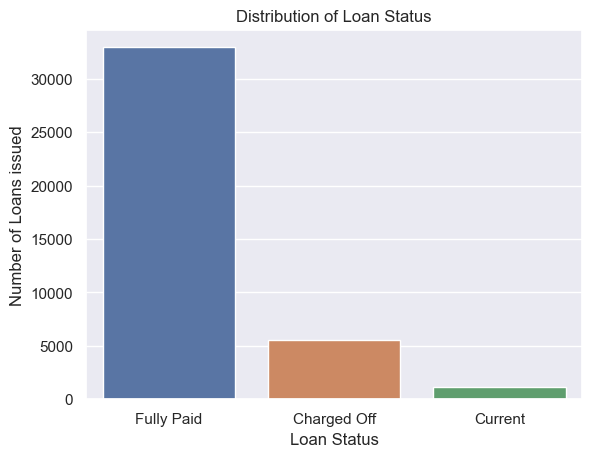

In [609]:
# Distribution of Loans by Status
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans issued")
plt.show()

Observation 1: In the data set we have Fully paid loan status with the highest number.
1. Fully Paid     32950
2. Charged Off     5556

In [610]:
#checking for value count 
df.purpose.value_counts()

debt_consolidation    18612
credit_card            5127
other                  3983
home_improvement       2973
major_purchase         2182
small_business         1820
car                    1549
wedding                 941
medical                 692
moving                  583
vacation                381
house                   379
educational             322
renewable_energy        102
Name: purpose, dtype: int64

Text(0.5, 0, 'Number of Loans issued')

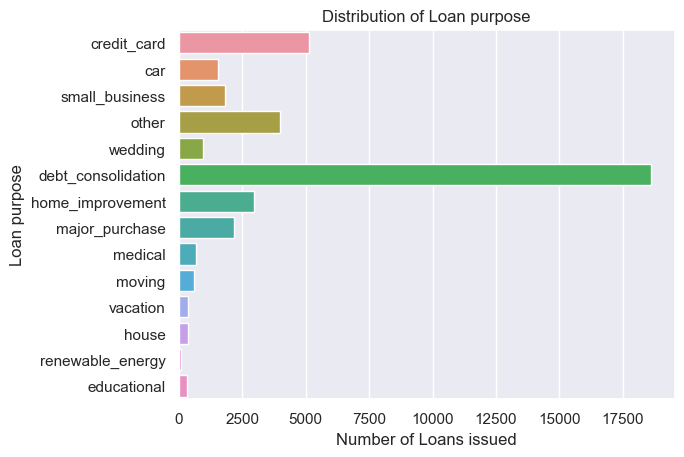

In [611]:
#Purpose : A category provided by the borrower for the loan request. 

# Distribution of Loans by Status
sns.countplot(y='purpose', data=df)
plt.title('Distribution of Loan purpose')
plt.ylabel("Loan purpose")
plt.xlabel("Number of Loans issued")

Observation 2: debt_consolidation is having the highest number of loan issued.


Top three loan status are:
1. debt_consolidation    18026
2. credit_card            5024
3. other                  3855

In [612]:
#checking for value count 
df.addr_state.value_counts()

CA    7080
NY    3804
FL    2863
TX    2719
NJ    1847
IL    1523
PA    1515
VA    1404
GA    1396
MA    1340
OH    1221
MD    1046
AZ     878
WA     840
CO     791
NC     786
CT     750
MI     719
MO     684
MN     614
NV     497
SC     472
WI     459
AL     450
OR     450
LA     436
KY     324
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     176
HI     174
NH     171
DE     113
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

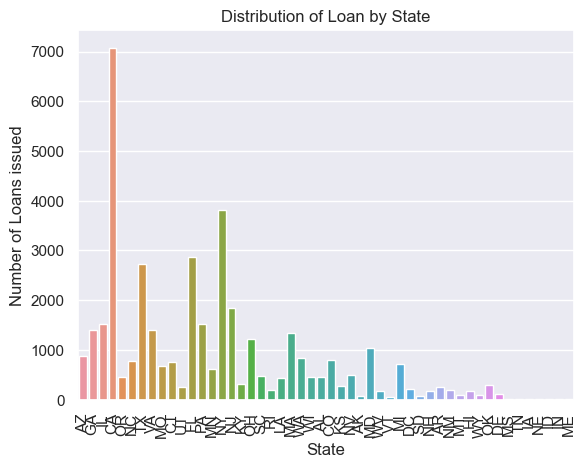

In [613]:
# Distribution of Loan by State
sns.countplot(x='addr_state', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Loan by State')
plt.ylabel("Number of Loans issued")
plt.xlabel("State")
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

Observation4: Number of loan issued in California state is the highest.

Top three states having heights number of loans are:
1. CA    6930
2. NY    3690
3. FL    2778

In [614]:
#checking for value count 
df.home_ownership.value_counts()

RENT        18847
MORTGAGE    17645
OWN          3053
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

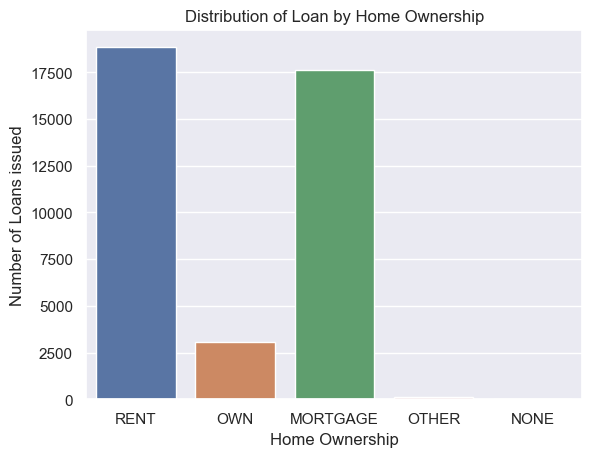

In [615]:
# Distribution of Loan by Home Ownership
sns.countplot(x='home_ownership', data=df)
plt.title('Distribution of Loan by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")
plt.show()

Observation 4: The above countplot shows loan alocated to people having different house status.

We can see Rent with 18428 number of loan issued is the highest among all.

In [616]:
#checking for value count 
df.term_period.value_counts()

36    29043
60    10603
Name: term_period, dtype: int64

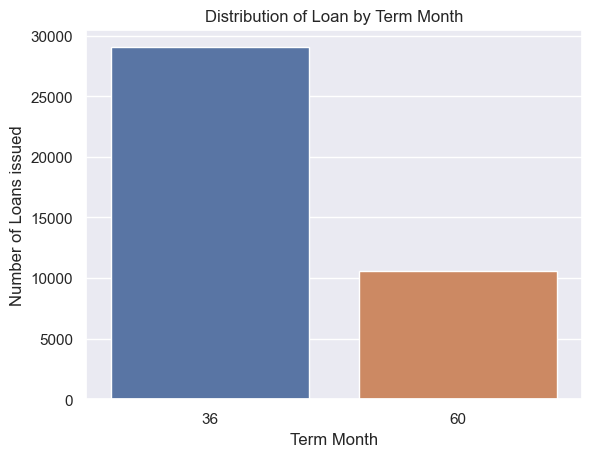

In [617]:
# Distribution of Loan by Term Month
sns.countplot(x='term_period', data=df)
plt.title('Distribution of Loan by Term Month')
plt.xlabel("Term Month")
plt.ylabel("Number of Loans issued")
plt.show()

Observation 5: we can see the number of loan issued to 36 month is the highest. It could be possibly because of the consumer need, if the consumer wants to repay loan in only 36 months. 

In [618]:
#checking for value count 
df.verification_status.value_counts()

Not Verified       16884
Verified           12789
Source Verified     9973
Name: verification_status, dtype: int64

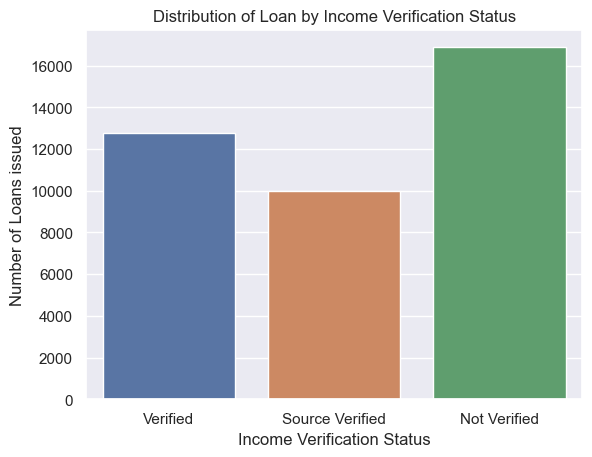

In [619]:
# Distribution of Loan by Income Verification Status
sns.countplot(x='verification_status', data=df)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")
plt.show()

Observation 6: loan issued to non verified status is the highest.

## Univariate Analysis on Ordered Categorical Variables

In [620]:
#checking for value count 
df.grade.value_counts()

B    12006
A    10079
C     8073
D     5294
E     2833
F     1047
G      314
Name: grade, dtype: int64

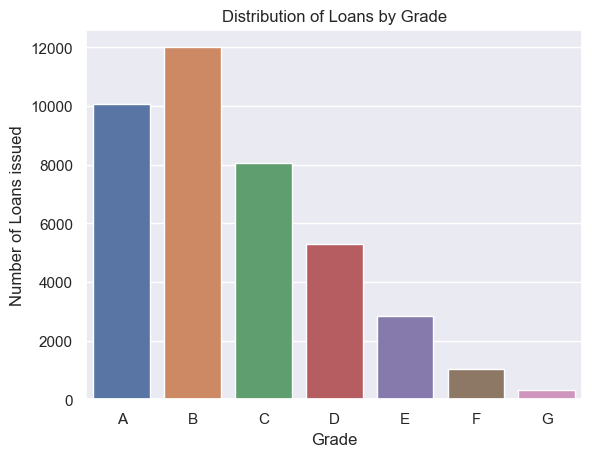

In [621]:
sns.countplot( x="grade", data=df,order = np.sort(df['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")
plt.show()

Observation 7: Number of loan issued to Greade B is highest.

In [622]:
#checking for value count 
df.sub_grade.value_counts()

B3    2916
A4    2886
A5    2738
B5    2702
B4    2506
C1    2133
B2    2054
C2    2004
B1    1828
A3    1809
C3    1522
A2    1507
D2    1345
C4    1232
C5    1182
D3    1171
A1    1139
D4     978
D1     928
D5     872
E1     763
E2     650
E3     551
E4     453
E5     416
F1     329
F2     248
F3     185
F4     167
F5     118
G1     102
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

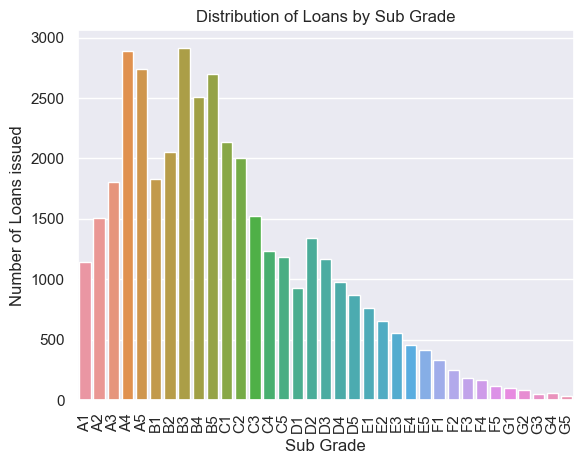

In [623]:
sns.countplot( x="sub_grade", data=df, order = np.sort(df['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

Observation 8: Subgrade A4 is having highest number of loan issued.
    
Top three subgrades:
1. A4    2873
2. B3    2824
3. A5    2711

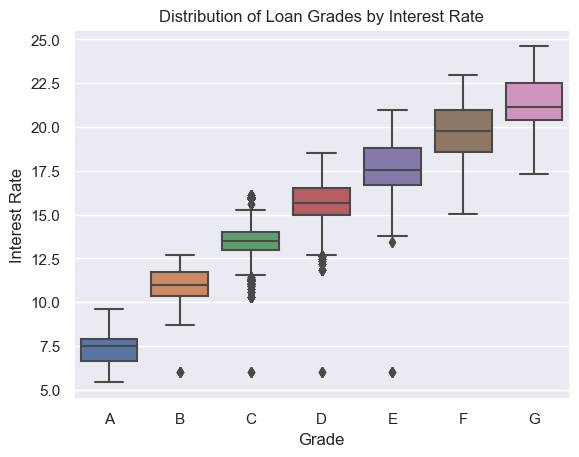

In [640]:
# Distribution of Loan Grades by Interest Rate
sns.boxplot(x="grade", y="int_rate", data=df, order = np.sort(df['grade'].unique()))
plt.title('Distribution of Loan Grades by Interest Rate')
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.show()

Observation 9: From grade A to G Interest rate is increased

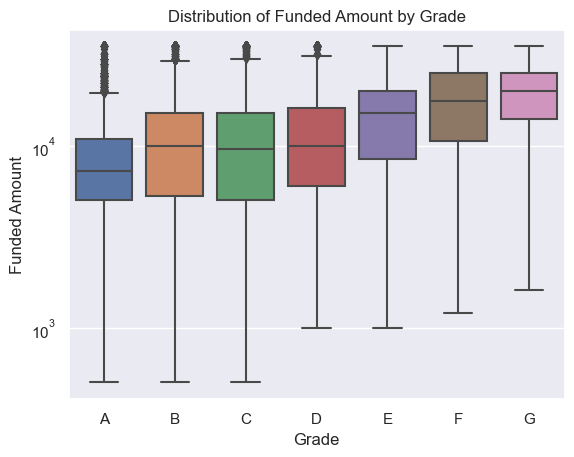

In [625]:
# Distribution of Funded Amount by Grade
sns.boxplot(x="grade", y="funded_amnt" , data=df, order = np.sort(df['grade'].unique()))
plt.title('Distribution of Funded Amount by Grade')
plt.xlabel("Grade")
plt.ylabel("Funded Amount")
plt.yscale('log')
plt.show()

Observation 10: There are high funded amount in A,B,C and D grades

In [626]:
#checking for value count 
df.emp_length.value_counts()

10.000000    8870
0.000000     4575
2.000000     4382
3.000000     4088
4.000000     3428
5.000000     3273
1.000000     3229
6.000000     2228
7.000000     1772
8.000000     1476
9.000000     1255
4.974829     1070
Name: emp_length, dtype: int64

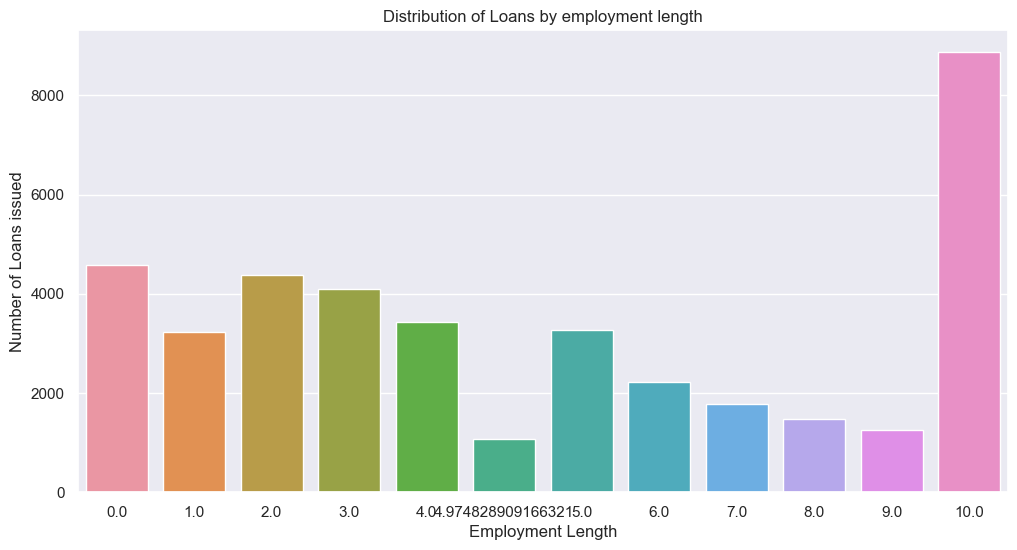

In [627]:
# Distribution of Loans by employment length
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=df)
plt.title('Distribution of Loans by employment length')
plt.xlabel("Employment Length")
plt.ylabel("Number of Loans issued")
plt.show()

Observation 11: Majority of borrowers have been employed for at least 10 years.

### Bivariate Analysis on Continuous Variables

<Figure size 1200x600 with 0 Axes>

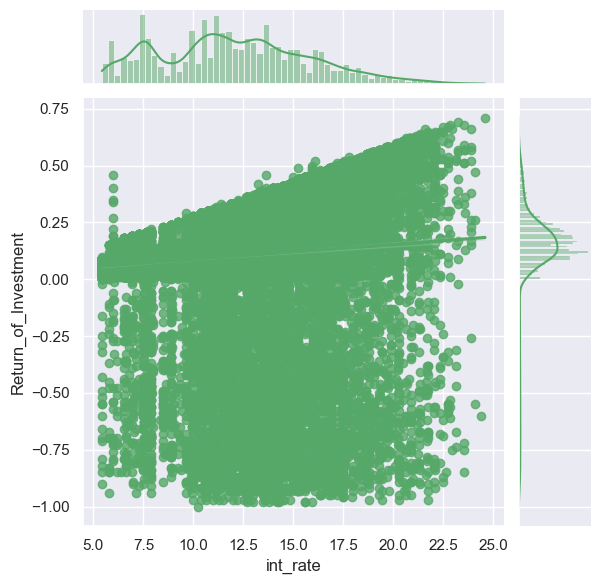

In [628]:
# Return_of_Investment vs Interest Rate and Annual Income
plt.figure(figsize=(12,6))

sns.set(style="darkgrid", color_codes=True)

sns.jointplot(x="int_rate", y="Return_of_Investment", data=df, kind="reg", color="g")

plt.show()

Observation 12: There was a positive correlation between interest rates and ROI for borrowers who paid their loans, but for those who didn’t pay the ROI was negative and it shows no correlation with interest rates.

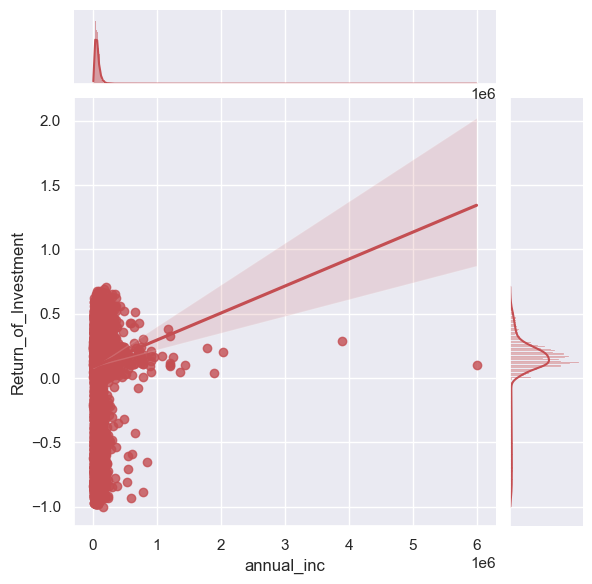

In [629]:
sns.jointplot(x="annual_inc", y="Return_of_Investment", data=df, kind="reg", color="r")

plt.show()

Observation 13: Borrowers with higher income has positive ROI while borrowers with lower income has negative ROI.

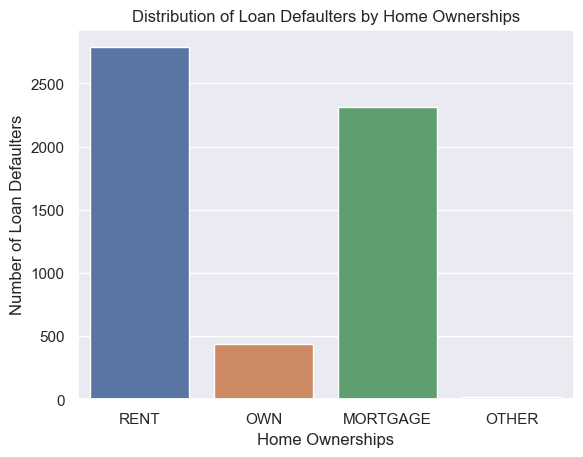

home_ownership
MORTGAGE    2313
OTHER         18
OWN          438
RENT        2787
Name: home_ownership, dtype: int64


In [630]:
# Loan Defaulters Analysis
sns.countplot(x='home_ownership',  data=df[df['loan_status']=='Charged Off'])
plt.title('Distribution of Loan Defaulters by Home Ownerships')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.show()

print (df[df['loan_status']=='Charged Off'].groupby(['home_ownership'])['home_ownership'].count())

Observation 14: It shows there are more defaulters in RENT and MORTGAGE

In [634]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term_period', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies',
       'num_of_mnts_paid', 'date_of_mnts_paid', 'issued_month', 'issued_year',
       'Return_of_Investment'],
      dtype='object')

In [647]:
df.delinq_amnt.value_counts()

0    39717
Name: delinq_amnt, dtype: int64

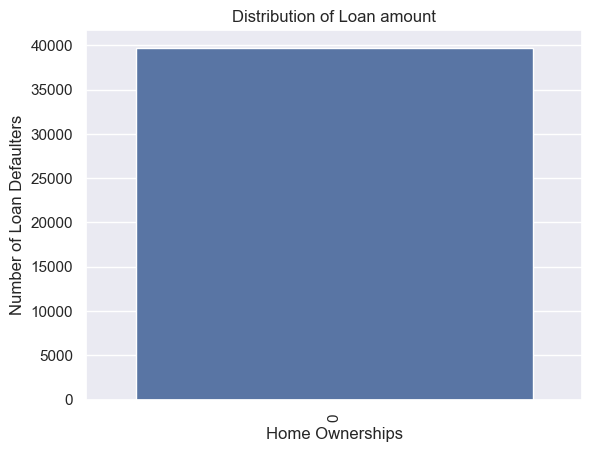

In [648]:
sns.countplot(x='delinq_amnt', data=df)
plt.title('Distribution of Loan amount')
plt.xlabel("Home Ownerships")
# To rotate axis text
plt.xticks(rotation=90)
plt.ylabel("Number of Loan Defaulters")
plt.show()

Observations:
1. In the data set we have Fully paid loan status with the heights number.
2. debt_consolidation is having the highest number of loan issued.
3. Number of loan issued in California state is the heighst.
4. Rent with 18428 number of loan issued is the height among all
5. We can see the number of loan issued to 36 month is the highest.
6. loan issued to non verified status is the highest.
7. Number of loan issued to Greade B is highest.
8. Subgrade A4 is having highest number of loan issued.
9. From grade A to G Interest rate is increased
10. There are high funded amount in A,B,C and D grades
11. Majority of borrowers have been employed for at least 10 years.
12. There was a positive correlation between interest rates and return of interest for borrowers who paid their loans.
13. Borrowers with higher income has positive return of interest.
14. There are more defaulters in RENT and MORTGAGE, so issuing loan to them in future could be risky.
